### Read in ARTS datasets

In [6]:
import pickle
import pandas as pd
from matcher import get_mapping_of_LF_and_dims
import pandas as pd
import numpy as np

In [219]:
def load_ARTS_data(dims):
    X = []
    y = []

    if dims == 94:
        path_X = f"/workspace/datasets/ds_labels/arts94-1249_labels.pkl"        
        path_y = f"/workspace/datasets/ds_labels/Gold_Scores.pkl"        
    if dims == 300:
        path_X = f"/workspace/datasets/ds_labels/arts300-1249_labels.pkl"        
        path_y = f"/workspace/datasets/ds_labels/gpt300_Scores.pkl"        
    if dims == 3000:
        path_X = f"/workspace/datasets/ds_labels/arts3000-1249_labels.pkl"        
        path_y = f"/workspace/datasets/ds_labels/gpt3000_Scores.pkl"  

    X_labels = pickle.load(open(path_X, "rb"))
    y_labels = pickle.load(open(path_y, "rb"))
    
    for entry in X_labels:
        vals = []

        for n in entry:
            if n == 0: # simple
                vals.append(1)
            else:
                if n == -1: # abstain 
                    vals.append(0)
                else:
                    if n == 1: # complex
                        vals.append(1)

        X.append(vals)
    
    for i in range(len(X)):
        y.append(y_labels[i][0])

    return X, y

In [3]:
arts94_X, arts94_scores = load_ARTS_data(94)
arts300_X, arts300_scores = load_ARTS_data(300)
#arts3000_X, arts3000_scores = load_ARTS_data(3000)

In [220]:
dims_to_names, names_to_dims, name_to_thresless, name_to_category, name_to_feature = get_mapping_of_LF_and_dims()

In [221]:
names_to_comp_simp = {}

df_cs = pd.DataFrame(arts300_X)

for dim in range(len(arts300_X[0])):
    cnts = df_cs[dim].value_counts()

    name = dims_to_names[dim][0]

    if 1 in cnts:
        names_to_comp_simp[name] = 'simp'
    else:
        if -1 in cnts:
            names_to_comp_simp[name] = 'complex'
        else:
            if 'NOT_SIMPLE' in name:
                names_to_comp_simp[name] = 'complex'
            else:
                if 'SIMPLE' in name:
                    names_to_comp_simp[name] = 'simp'
                else:
                    if 'label=1' in name:
                        names_to_comp_simp[name] = 'complex'
                    else:
                        if 'label=0' in name:
                            names_to_comp_simp[name] = 'simp'
                        else:
                            if dim == 228 or dim == 229 or dim == 230 or dim == 555 or dim == 556 or dim == 557 or dim == 558 or dim == 559 or dim == 560 or dim == 561 or dim == 562 or \
                                dim == 563 or dim == 564 or dim == 565 or dim == 566 or dim == 567 or dim == 568 or dim == 569 or dim == 570 or dim == 571 or dim == 571 or dim == 572 or \
                                dim == 573 or dim == 574:
                                names_to_comp_simp[name] = 'simp'
                            else:
                                if dim == 985 or dim == 991 or dim == 992 or dim == 993 or dim == 994 or dim == 995 or dim == 1001 or dim == 1002 or dim == 1004 or dim == 1005:
                                    names_to_comp_simp[name] = 'complex'
                                else:
                                    print(dim)
                                    print(name)

cnt_feat = {}
cnt_cat = {}

comp_name_to_feature = {}
simp_name_to_feature = {}

for name in name_to_feature:
    feat = name_to_feature[name]
    if names_to_comp_simp[name] == 'simp':
        simp_name_to_feature[name] = feat
    
        if feat + '_simp' not in cnt_feat:
            cnt_feat[feat + '_simp'] = 1
        else:
            cnt_feat[feat + '_simp'] += 1
    else:
        comp_name_to_feature[name] = feat

        if feat + '_complex' not in cnt_feat:
            cnt_feat[feat + '_complex'] = 1
        else:
            cnt_feat[feat + '_complex'] += 1

comp_name_to_cat = {}
simp_name_to_cat = {}

for name in name_to_category:
    cat = name_to_category[name]
    if names_to_comp_simp[name] == 'simp':
        comp_name_to_cat[name] = cat

        if cat + '_simp' not in cnt_cat:
            cnt_cat[cat + '_simp'] = 1
        else:
            cnt_cat[cat + '_simp'] += 1
    else:
        simp_name_to_cat[name] = cat

        if cat + '_complex' not in cnt_cat:
            cnt_cat[cat + '_complex'] = 1
        else:
            cnt_cat[cat + '_complex'] += 1

In [222]:
print(len(comp_name_to_feature))
print(len(simp_name_to_feature))

560
689


#### Create structures containing summed up values for dimensions per representarion

In [223]:
def fill_ds_for_arts(artsNUM):
    para_to_dim_simp = {}
    para_to_dim_comp = {}

    inter_to_dim_simp = {}
    inter_to_dim_comp = {}

    feat_to_dim_simp = {}
    feat_to_dim_comp = {}
    cat_to_dim_simp = {}
    cat_to_dim_comp = {}

    inter_simp = set()
    inter_comp = set()

    for i in range(len(artsNUM[0])):
        name = dims_to_names[i][0].strip()
        stance = names_to_comp_simp[name]

        if stance == 'simp':
            if not name in para_to_dim_simp:
                para_to_dim_simp[name] = len(para_to_dim_simp)

            inter = name_to_thresless[name].strip()
            if inter not in inter_to_dim_simp:
                inter_to_dim_simp[inter] = len(inter_to_dim_simp)
                inter_simp.add(inter)

            feat = name_to_feature[name].strip()
            if feat not in feat_to_dim_simp:
                feat_to_dim_simp[feat] = len(feat_to_dim_simp)
            
            cate = name_to_category[name].strip()
            if cate not in cat_to_dim_simp:
                cat_to_dim_simp[cate] = len(cat_to_dim_simp)
        else: 
            if not name in para_to_dim_comp:
                para_to_dim_comp[name] = len(para_to_dim_comp)

            inter = name_to_thresless[name].strip()
            if inter not in inter_to_dim_comp:
                inter_to_dim_comp[inter] = len(inter_to_dim_comp)
                inter_comp.add(inter)

            feat = name_to_feature[name].strip()
            if feat not in feat_to_dim_comp:
                feat_to_dim_comp[feat] = len(feat_to_dim_comp)
            
            cate = name_to_category[name].strip()
            if cate not in cat_to_dim_comp:
                cat_to_dim_comp[cate] = len(cat_to_dim_comp)

    all_para_s = []
    all_para_c = []

    all_int_s = [] # NUM * 72
    all_int_c = [] # NUM * 61

    all_feat_s = [] # NUM * 37
    all_feat_c = [] # NUM * 34

    all_cat_s = [] # NUM * 4
    all_cat_c = [] # NUM * 4

    for i in range(len(artsNUM)):
        all_para_s.append([0] * len(simp_name_to_feature))
        all_para_c.append([0] * len(comp_name_to_feature))

        temp = []
        for i in range(len(inter_simp)):
            temp.append([])
        all_int_s.append(temp)
        
        temp = []
        for i in range(len(inter_comp)):
            temp.append([])
        all_int_c.append(temp)

        temp = []
        for i in range(37):
            temp.append([])
        all_feat_s.append(temp)   

        temp = []
        for i in range(34):
            temp.append([])
        all_feat_c.append(temp)    

        temp = []
        for i in range(4):
            temp.append([])
        all_cat_s.append(temp)
        all_cat_c.append(temp)


    # fill structures
    dataset = artsNUM

    for i in range(len(artsNUM)): # NUM
        for j in range(len(artsNUM[i])): # 1249
            c_val = dataset[i][j]

            c_name = dims_to_names[j][0]
            c_stance = names_to_comp_simp[c_name]

            if c_stance == 'simp':
                c_para = para_to_dim_simp[c_name]
                all_para_s[i][c_para] = c_val
                c_inter = inter_to_dim_simp[name_to_thresless[c_name]]
                all_int_s[i][c_inter].append(c_val)
                c_feat = feat_to_dim_simp[name_to_feature[c_name]]
                all_feat_s[i][c_feat].append(c_val)
                c_cat = cat_to_dim_simp[name_to_category[c_name]]
                all_cat_s[i][c_cat].append(c_val)
            else:
                c_para = para_to_dim_comp[c_name]
                all_para_c[i][c_para] = c_val
                c_inter = inter_to_dim_comp[name_to_thresless[c_name]]
                all_int_c[i][c_inter].append(c_val)
                c_feat = feat_to_dim_comp[name_to_feature[c_name]]
                all_feat_c[i][c_feat].append(c_val)
                c_cat = cat_to_dim_comp[name_to_category[c_name]]
                all_cat_c[i][c_cat].append(c_val)


    for i in range(len(artsNUM)):
        for j in range(len(inter_simp)):
            all_int_s[i][j] = sum(all_int_s[i][j])/len(all_int_s[i][j])

        for j in range(len(inter_comp)):
            all_int_c[i][j] = sum(all_int_c[i][j])/len(all_int_c[i][j])

        for j in range(37):
            tmp = sum(all_feat_s[i][j])/len(all_feat_s[i][j])
            all_feat_s[i][j] = tmp

        for j in range(34):
            if '[' in str(all_feat_c[i][j]):
                all_feat_c[i][j] = sum(all_feat_c[i][j]) / len(all_feat_c[i][j])
            
        for j in range(4):
            all_cat_s[i][j] = sum(all_cat_s[i][j])/len(all_cat_s[i][j])

            if '[' in str(all_cat_c[i][j]):
                all_cat_c[i][j] = sum(all_cat_c[i][j]) / len(all_cat_c[i][j])
            
    all_para_s = pd.DataFrame(all_para_s)
    all_para_c = pd.DataFrame(all_para_c)
    all_inter_s = pd.DataFrame(all_int_s)
    all_inter_c = pd.DataFrame(all_int_c)
    all_feat_s = pd.DataFrame(all_feat_s)
    all_feat_c = pd.DataFrame(all_feat_c)
    all_cat_s = pd.DataFrame(all_cat_s)
    all_cat_c = pd.DataFrame(all_cat_c)

    return all_para_s, all_para_c, all_inter_s, all_inter_c, all_feat_s, all_feat_c, all_cat_s, all_cat_c, feat_to_dim_simp, feat_to_dim_comp, cat_to_dim_simp, cat_to_dim_comp

In [224]:
all_para_s_94, all_para_c_94, all_inter_s_94, all_inter_c_94, all_feat_s_94, all_feat_c_94, all_cat_s_94, all_cat_c_94, feat_to_dim_simp_94, feat_to_dim_comp_94, cat_to_dim_simp_94, cat_to_dim_comp_94 = fill_ds_for_arts(arts94_X)
all_para_s_300, all_para_c_300, all_inter_s_300, all_inter_c_300, all_feat_s_300, all_feat_c_300, all_cat_s_300, all_cat_c_300, feat_to_dim_simp_300, feat_to_dim_comp_300, cat_to_dim_simp_300, cat_to_dim_comp_300 = fill_ds_for_arts(arts300_X)

#### Visualisation

In [179]:
import math
from scipy import stats
import seaborn as sns

In [242]:
def get_data(simple, rep):
    yticklabels = []
    if simple:
        if rep == 'para':
            curr_94 = all_para_s_94
            curr_300 = all_para_s_300
            title = 'Correlation of Parametrisations (simple) with ARTS scores'
            sns.set(rc = {'figure.figsize':(5,15)})

        if rep == 'inter':
            curr_94 = all_inter_s_94
            curr_300 = all_inter_s_300
            title = 'Correlation of Interpretations (simple) with ARTS scores'
            sns.set(rc = {'figure.figsize':(5,10)})

        if rep == 'feat':
            curr_94 = all_feat_s_94
            curr_300 = all_feat_s_300
            title = 'Correlation of Features (simple) with ARTS scores'

            feat_names_heatmap = []

            f2f = {}
            for cc in feat_to_dim_simp_300:
                f2f[feat_to_dim_simp_300[cc]] = cc
            for i in range(len(f2f)):
                feat_names_heatmap.append(f2f[i])

            yticklabels=[]#feat_names_heatmap
            sns.set(rc = {'figure.figsize':(5,7.5)})
        if rep == 'cat':
            curr_94 = all_cat_s_94
            curr_300 = all_cat_s_300
            title = 'Correlation of Categories (simple) with ARTS scores'             

            cat_names_heatmap = []

            c2f = {}

            for cc in cat_to_dim_simp_300:
                c2f[cat_to_dim_simp_300[cc]] = cc

            for i in range(len(c2f)):
                cat_names_heatmap.append(c2f[i])

            yticklabels=[]#cat_names_heatmap
            sns.set(rc = {'figure.figsize':(5,2)})
    else:
        if rep == 'para':
            curr_94 = all_para_c_94
            curr_300 = all_para_c_300
            title = 'Correlation of Parametrisations (complex) with ARTS scores'
            sns.set(rc = {'figure.figsize':(5,15)})

        if rep == 'inter':
            curr_94 = all_inter_c_94
            curr_300 = all_inter_c_300
            title = 'Correlation of Interpretations (complex) with ARTS scores'
            sns.set(rc = {'figure.figsize':(5,10)})

        if rep == 'feat':
            curr_94 = all_feat_c_94
            curr_300 = all_feat_c_300
            title = 'Correlation of Features (complex) with ARTS scores'

            feat_names_heatmap = []

            f2f = {}
            for cc in feat_to_dim_comp_300:
                f2f[feat_to_dim_comp_300[cc]] = cc
            for i in range(len(f2f)):
                feat_names_heatmap.append(f2f[i])

            yticklabels=[]#feat_names_heatmap
            sns.set(rc = {'figure.figsize':(5,7.5)})
        if rep == 'cat':
            curr_94 = all_cat_c_94
            curr_300 = all_cat_c_300
            title = 'Correlation of Categories (complex) with ARTS scores'             

            cat_names_heatmap = []

            c2f = {}

            for cc in cat_to_dim_comp_300:
                c2f[cat_to_dim_comp_300[cc]] = cc

            for i in range(len(c2f)):
                cat_names_heatmap.append(c2f[i])

            yticklabels=[]#cat_names_heatmap
            sns.set(rc = {'figure.figsize':(5,2)})  

    cors94 = []

    for i in curr_94.columns:
        cor = stats.pearsonr(curr_94[i], arts94_scores)[0]
        if not math.isnan(cor):
            cors94.append(cor)
        else:
            cors94.append(0)
        
    cors300 = []

    for i in curr_300.columns:
        cor = stats.pearsonr(curr_300[i], arts300_scores)[0]
        if not math.isnan(cor):
            cors300.append(cor)
        else:
            cors300.append(0)

    return cors94, cors300, title, yticklabels

     ARTS_94  ARTS_300
0  -0.673670 -0.531389
1  -0.489990 -0.282906
2   0.196097  0.209009
3  -0.404362 -0.191266
4  -0.636199 -0.493096
5  -0.453357 -0.317687
6  -0.132179 -0.183391
7  -0.369318 -0.288999
8  -0.359605 -0.245230
9   0.157564  0.130394
10  0.009440 -0.005068
11  0.079010  0.077668
12 -0.674599 -0.569034
13 -0.001829  0.001525
14 -0.059380 -0.088492
15  0.144356 -0.127386
16  0.000000 -0.000581
17 -0.295276 -0.181730
18  0.000000 -0.000581
19 -0.393276 -0.410334
20 -0.409763 -0.366697
21  0.000000  0.000000
22 -0.532662 -0.414899
23 -0.372344 -0.315697
24 -0.176815 -0.171174
25 -0.217006 -0.256918
26 -0.066538 -0.190463
27 -0.073288 -0.145616
28 -0.317707 -0.270195
29 -0.161528 -0.158480
30  0.052594 -0.011129
31  0.138003 -0.057672
32 -0.128763 -0.167803
33 -0.343024 -0.190802
34  0.221988 -0.014799
35 -0.376268 -0.286890
36  0.000000  0.000000


/usr/local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Text(0.5, 1.0, 'Correlation of Features (simple) with ARTS scores')

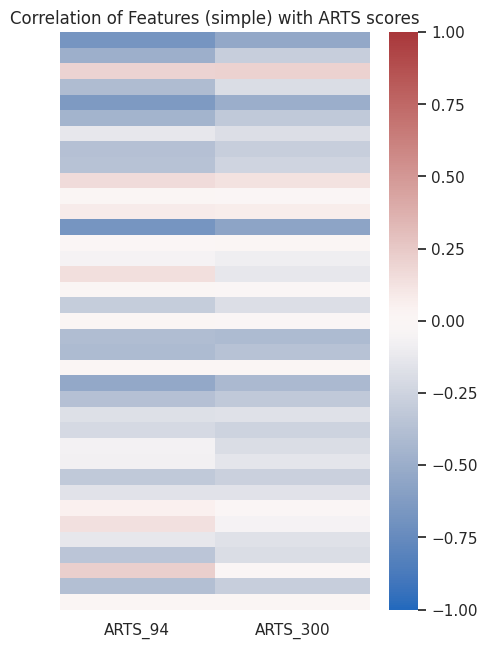

In [267]:
simple = True
rep = 'para'
cors94, cors300, title, yticklabels = get_data(simple, rep)

para_df = pd.DataFrame({'ARTS_94': cors94, 'ARTS_300': cors300})

print(para_df)

new_df = []

for i, r in para_df.iterrows():
    # filter lfs raus


sns.heatmap(para_df, vmin=-1, vmax=1, cmap='vlag', yticklabels=yticklabels).set_title(title)

[-0.40356458233804265, -0.6619765896549151, -0.4530988629560897, -0.45632866891102564]


Text(0.5, 1.0, 'Correlation of Categories (complex) with ARTS scores')

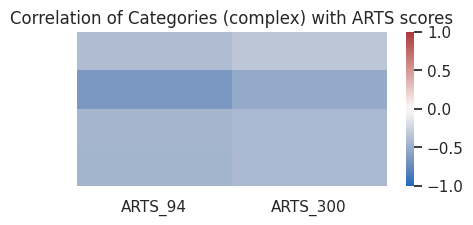

In [265]:
simple = False
rep = 'cat'
cors94, cors300, title, yticklabels = get_data(simple, rep)
print(cors94)
para_df = pd.DataFrame({'ARTS_94': cors94, 'ARTS_300': cors300})
sns.heatmap(para_df, vmin=-1, vmax=1, cmap='vlag', yticklabels=yticklabels).set_title(title)